<a href="https://colab.research.google.com/github/cubshuang/PythonPractice/blob/master/1120326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Latex Math

$ 標準差 ＝ \frac {1}{n} \sum_{i=1}^n (p_i - \mu) ^ 2 $

[ ]：清單型態 (List)

{ }：字典型態 (Dict) 

In [14]:
import pandas as pd
import urllib.request as req

url="https://github.com/Elwing-Chou/kmu/raw/main/danmu.txt"

#response=req.urlopen(url)
req.urlretrieve(url, "danmu.txt")
#pd.DataFrame 表格 
#pd.Series    一行 / 一列
df = pd.read_json("danmu.txt",encoding="utf-8")
df

#df["time"].quantile(0.25)



,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [15]:
df["userid"].value_counts()
df.groupby(["userid"]).head(1)

,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2994,2021.10.31,#FFFFFF,1,0,70063,23791639,bear450476
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358


pandas最重要

過濾: 準備跟你資料表依樣多的True/False, DataFrame[依樣多True/False]

轉換

In [16]:
start = df["time"].min()
q1 = df["time"].quantile(0.25)
q2 = df["time"].quantile(0.5)
q3 = df["time"].quantile(0.75)
end = df["time"].max()
# print(start, q1, q2, q3, end)
# &: and |: or, 兩個條件要加()
fil = (df["time"] > q1) & (df["time"] < q3)
df[fil].to_csv("baha.csv", encoding="utf-8")
df[fil]

,text,color,size,position,time,sn,userid
751,砍樹的姿勢很正確,#FFFFFF,1,0,19498,23449362,ck290996
752,做夢還要砍柴Q,#FDE53D,2,2,19511,22961157,JJHH09876
753,樹：幹連作夢也要砍我,#FFFFFF,1,0,19514,25082702,Joeychen96
754,禰豆子呢,#FFFFFF,1,0,19557,31637167,LEON05162001
755,好溫柔QQ,#FFFFFF,1,0,19611,22870968,lin00lin00
...,...,...,...,...,...,...,...
2245,大哥沒有輸！！,#FFFFFF,1,0,60864,22456885,fantasy074
2246,大哥沒有輸！！！！！,#FFFFFF,1,0,60865,24235233,stsamsamsam
2247,大哥沒有輸！！！！！！,#FF0026,2,0,60868,29216588,song8998
2248,大哥沒有輸！！！,#FFFFFF,1,0,60870,23874785,tracyOWO


Jieba函式庫

TD-IDF


轉換操作: 定義一個轉換(函式) -> Series.apply(函式名稱)
# def test(a, b):
#     c = a + b
#     return c
# 型態/操作

In [19]:
s ="""近日有桃園民眾發現有隻「東非狒狒」在外遊蕩，外界質疑該狒狒從六福村逃脫，不過六福村已對外否認此事。有網友今（25）日捕捉到東非狒狒的最新身影，今天上午牠已跑到楊梅民有路二段附近，原po除了釋出影片外，也貼心提醒「請大家小心喔！」

東非狒狒在外桃園地區遊蕩引起關注，有網友今天在臉書社團「我是富岡人」po文，指早上在楊梅民有路二段附近發現了東非狒狒的身影，原po還附上從汽車內所拍攝的影片，可見東非狒狒輕鬆走在圍牆上頭，牠還隨意四處張望。

該篇po文曝光再度引起熱議，不少人湧入留言，「還在跟家人開玩笑要招待牠，真的跑來附近！」「各位鄉親小心您的高麗菜！」「從新屋到楊梅了」「這狒狒成為大明星了，捕捉到後 他的名子就取名為『狒狒揚揚』」。

由於狒狒為靈長類中較具攻擊性的物種，而且擁有銳利犬齒，林務局前（23）日就提醒民眾，若遇到狒狒時，不要與牠眼神對視、不要露齒微笑（露齒對狒狒來說是威嚇）、不要尖叫、不要轉過身奔跑，因為以上行為都可能會激怒狒狒，若民眾手中有食物也請立即放下，並且緩慢離去，再撥打1999通報當地縣市政府。"""

In [36]:

import jieba
import jieba.analyse

#提取分詞出現的次數
jieba.analyse.extract_tags(s)


['狒狒',
 '東非',
 'po',
 '楊梅',
 '桃園',
 '民眾',
 '發現',
 '遊蕩',
 '網友',
 '露齒',
 '二段',
 '民有',
 '捕捉到',
 '不要',
 '附近',
 '在外',
 '身影',
 '影片',
 '小心',
 '提醒']

In [35]:
#加入特定詞彙的比重
jieba.analyse.extract_tags(s,allowPOS=["n"], withWeight=True)


[('狒狒', 4.221269178735485),
 ('民眾', 1.1569129841516128),
 ('身影', 0.47747681363354844),
 ('影片', 0.4702346204606452),
 ('小心', 0.4333423830264516),
 ('內所', 0.38563766138387096),
 ('熱議', 0.38563766138387096),
 ('名子', 0.38563766138387096),
 ('行為', 0.38563766138387096),
 ('新屋', 0.2970751538629032),
 ('眼神', 0.2471097357032258),
 ('家人', 0.22590234544677418),
 ('外界', 0.22276863439161293),
 ('食物', 0.20398566842258065),
 ('大家', 0.15714514545387098)]

In [47]:
# 轉換操作: 定義一個轉換(函式) -> Series.apply(函式名稱)
# def test(a, b):
#     c = a + b
#     return c
# 型態/操作
# list[0]
# test:步驟SOP型態 ():真的執行
# test(3, 4)
# a = test
# a(3, 4)

import jieba
import jieba.analyse

# 準備對巴哈姆特彈幕分析
# url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
# req.urlretrieve(url, "bigdic")
# jieba.set_dictionary("bigdic")
# " ".join(jieba.cut(s))

def change(s):
   return " ".join(jieba.cut(s))
# change(s)
# change("我喜歡你")
text_cut = df["text"].apply(change)
text_cut

0                 祝 ☆ TV 動畫 化
1                   要 怎麼 用 雙語
2                    20210822
3                          卡個
4            2021 / 10 / 6 五刷
                ...          
2996     2022.01 . 16   神作 留名
2997     2022.02 . 13   神作 留名
2998    大哥 沒有 輸 ， 大哥 一路 走 好 !
2999       2022.08 . 09 神作 留名
3000     2022.11 . 10   神作 留名
Name: text, Length: 3001, dtype: object

In [48]:
combine = "\n".join(text_cut)
keywords= jieba.analyse.extract_tags(combine,allowPOS=["n"],withWeight=True)
keywords

[('大哥', 2.1847287421275228),
 ('炭治郎', 0.20938291706497078),
 ('炎柱', 0.15952984157331107),
 ('好帥', 0.1395886113766472),
 ('正片', 0.13326615230483738),
 ('豆子', 0.09501876635239365),
 ('太太', 0.06831407293421184),
 ('晚安', 0.06574757485971643),
 ('男人', 0.06439994196761467),
 ('肚子', 0.059876997090825695),
 ('變鬼', 0.05982369058999165),
 ('妹妹', 0.05860282866155129),
 ('之刃', 0.05796779671392828),
 ('眼睛', 0.05566103452758965),
 ('首刷', 0.04985307549165971),
 ('玩火', 0.04836569040450375),
 ('乘客', 0.0465992381850709),
 ('抗性', 0.04326237334195162),
 ('鬼片', 0.03988246039332777),
 ('頭柱', 0.03988246039332777)]

靜態視覺化: matplotlib(基礎) -> seaborn(進階)

動態視覺化: plotly altair

countplot: 數數對象是類別型

barplot: 不數數, 我自己給值

histogram(histplot): 數對象是連續型(0-10歲有幾個) 可修改可修改kde=True

scatterplot: x, y是連續型



In [ ]:
#準備視覺化
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !開始都是 linux指令
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager 

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '大哥'),
  Text(1, 0, '炭治郎'),
  Text(2, 0, '炎柱'),
  Text(3, 0, '好帥'),
  Text(4, 0, '正片'),
  Text(5, 0, '豆子'),
  Text(6, 0, '太太'),
  Text(7, 0, '晚安'),
  Text(8, 0, '男人'),
  Text(9, 0, '肚子'),
  Text(10, 0, '變鬼'),
  Text(11, 0, '妹妹'),
  Text(12, 0, '之刃'),
  Text(13, 0, '眼睛'),
  Text(14, 0, '首刷'),
  Text(15, 0, '玩火'),
  Text(16, 0, '乘客'),
  Text(17, 0, '抗性'),
  Text(18, 0, '鬼片'),
  Text(19, 0, '頭柱')])

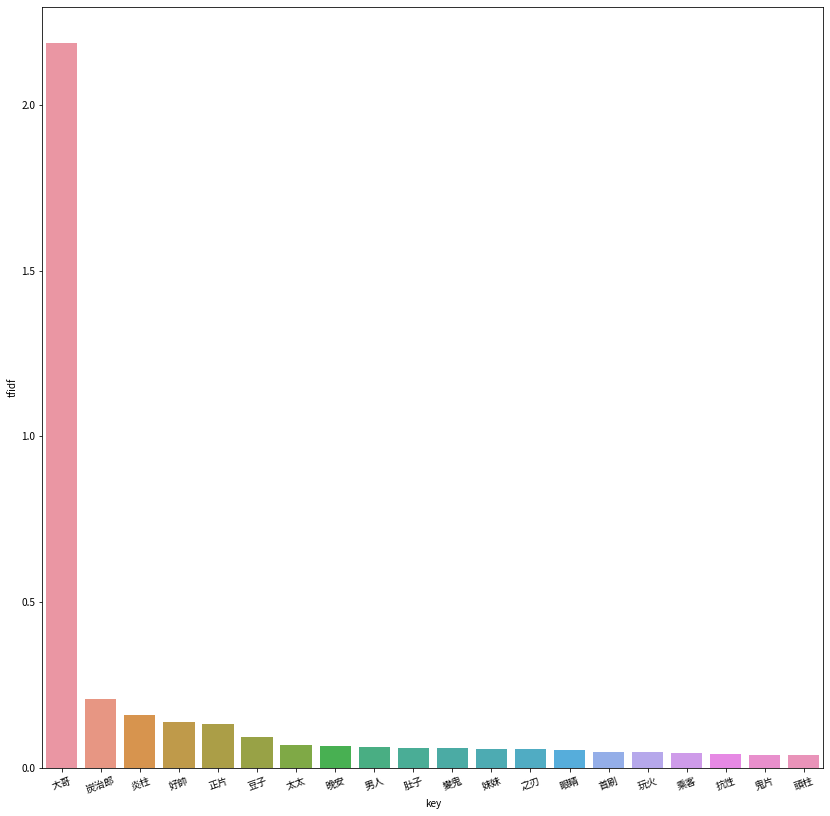

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 14))
# 第一種: x, y都是一個list
# zip(*keywords). -> >??
# xs = [k for k, v in keywords]
xs = [wd for wd, tfidf in keywords]
ys = [tfidf for wd, tfidf in keywords]
# [n ** 2 for n in [0, 1, 2]]
# sns.barplot(x=xs, y=ys)
# 第二種: df
keydf = pd.DataFrame(keywords, columns=["key", "tfidf"])
sns.barplot(data=keydf, x="key", y="tfidf")
# sns.boxplot(data=keydf, x="key", y="tfidf")
plt.xticks(rotation=20)

In [56]:
import altair as alt

# histogram
# mark_bar: 棒狀 mark_point: 點
chart = alt.Chart(df).mark_bar().encode(x=alt.X("time", bin=alt.BinParams(step=500)), y="count()")
# chart = alt.Chart(df).mark_boxplot.encode(x=alt.X("time", bin=alt.BinParams(step=500)), y="count()")
chart.interactive()

alt.Chart(...)

In [ ]:
from sklearn.manifold import TSNE
from tensorflow.keras.datasets.mnist import load_data
# mnist資料及是一個28 * 28的灰階圖片
# 0:黑 255:白
# x_test, y_test: 10000份圖片和她的答案
(x_train, y_train), (x_test, y_test) = load_data()

# 因為altair只能畫最多5000筆資料, 所以我各篩選了200筆
s = pd.DataFrame(y_test)
# 每一種東西拿到前200筆, 接著拿出她原本的index
idx = s.groupby(by=0).head(200).index
# 回到原本的位置把他們篩選出來
xs, ys = x_test[idx], y_test[idx]
plt.imshow(xs[0], cmap="gray")
# 把本來(2000, 28, 28)做一個reshape(2000, 784)
xs = xs.reshape(2000, 784)
print(xs.shape)
print(ys.shape)

台鐵火車時刻表依車站

In [37]:
import pandas as pd
import urllib.request as req
import requests as reqs
#from html.parser import HTMLParser

url="https://tip.railway.gov.tw/tra-tip-web/tip/tip001/tip112/querybystationblank?rideDate=2023/03/26&station=4440-鳳山"
response=reqs.get(url)
tml_str = response.text
#tml_str
tra = pd.read_html(tml_str)

print("型態：", type(tra))
print("長度：", len(tra))

#tra
tra_1_df = tra[0]  #讀取第一個表格
tra_1_df.columns 
#print(tra_1_df)

型態： <class 'list'>
長度： 2


Index(['項次', '車種車次 (始發站 → 終點站)', '出發時間', '終點站', '服務設施', '狀態'], dtype='object')